<a href="https://colab.research.google.com/github/diankaryoko01/diankaryoko01/blob/main/Dian_Karyoko_Final_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dian Karyoko, Jakarta Pusat, DKI Jakarta

**Mengimport Library dan Mengecek Versi TensorFlow**

In [ ]:
import pandas as pd
import os
import zipfile
import shutil
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.5.0


**Mengupload dan Mengekstraksi Data Rockpaperscissors**

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 12:45:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.05MB/s    in 45s     

2021-07-26 12:45:52 (6.86 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Memeriksa isi file
os.listdir('rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

**Membagi Data menjadi Train Set dan Validation Set**

In [ ]:
# Memeriksa jumlah data untuk label rock
len(os.listdir('rockpaperscissors/rock'))

726

In [ ]:
# Memeriksa jumlah data untuk label paper
len(os.listdir('rockpaperscissors/paper'))

712

In [ ]:
# Memeriksa jumlah data untuk label scissors
len(os.listdir('rockpaperscissors/scissors'))

750

In [ ]:
# Membuat train set dan validation set untuk masing-masing label
rock_train, rock_val = train_test_split(os.listdir('rockpaperscissors/rock'), test_size = 0.4)
paper_train, paper_val = train_test_split(os.listdir('rockpaperscissors/paper'), test_size = 0.4)
scissors_train, scissors_val = train_test_split(os.listdir('rockpaperscissors/scissors'), test_size = 0.4)

In [ ]:
# Memeriksa banyak data train set
len(rock_train) + len(paper_train) + len(scissors_train)

1312

In [ ]:
# Memeriksa banyak data validation set
len(rock_val) + len(paper_val) + len(scissors_val)

876

**Membuat Directory Baru untuk Menyimpan Train Set dan Validation Set**

In [ ]:
# Membuat directory baru bernama train dan val
train_dir = os.path.join('rockpaperscissors','train')
if not os.path.exists(train_dir):
  os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join('rockpaperscissors', 'val')
if not os.path.exists(validation_dir):
  os.makedirs(validation_dir, exist_ok=True)

# Membuat directory baru di dalam directory train dan val
train_rock = os.path.join(train_dir, 'rock')
if not os.path.exists(train_rock):
  os.mkdir(train_rock)

train_paper = os.path.join(train_dir, 'paper')
if not os.path.exists(train_paper):
  os.mkdir(train_paper)

train_scissors = os.path.join(train_dir, 'scissors')
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

val_rock = os.path.join(validation_dir, 'rock')
if not os.path.exists(val_rock):
  os.mkdir(val_rock)

val_paper = os.path.join(validation_dir, 'paper')
if not os.path.exists(val_paper):
  os.mkdir(val_paper)

val_scissors = os.path.join(validation_dir, 'scissors')
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# Memeriksa directory baru yang telah dibuat
os.listdir('rockpaperscissors/train')

['scissors', 'rock', 'paper']

In [ ]:
# Memeriksa directory baru yang telah dibuat
os.listdir('rockpaperscissors/val')

['scissors', 'rock', 'paper']

In [ ]:
# Memeriksa jumlah data pada train set untuk label rock, dipakai untuk cross-check pada code di bawah
a = len(rock_train)
print(a)

435


In [ ]:
# Memindahkan data train dan data val ke directory baru

for i in rock_train:
  shutil.move(os.path.join('rockpaperscissors/rock', i), os.path.join(train_rock, i))
for i in paper_train:
  shutil.move(os.path.join('rockpaperscissors/paper', i), os.path.join(train_paper, i))
for i in scissors_train:
  shutil.move(os.path.join('rockpaperscissors/scissors', i), os.path.join(train_scissors, i))
for i in rock_val:
  shutil.move(os.path.join('rockpaperscissors/rock', i), os.path.join(val_rock, i))
for i in paper_val:
  shutil.move(os.path.join('rockpaperscissors/paper', i), os.path.join(val_paper, i))
for i in scissors_val:
  shutil.move(os.path.join('rockpaperscissors/scissors', i), os.path.join(val_scissors, i))

In [ ]:
# Memeriksa apakah data berhasil dipindahkan (untuk contoh, diambil train set dari label rock)

if len(os.listdir('rockpaperscissors/train/rock')) == a :
  print('Data telah berhasil dipindahkan')
else :
  print('Data belum berhasil dipindahkan')

Data telah berhasil dipindahkan


In [ ]:
# Visualisasi data : membuat dataframe sebaran banyak data pada train set dan validation set
data = [['Rock', len(os.listdir('rockpaperscissors/train/rock')), len(os.listdir('rockpaperscissors/val/rock'))],
      ['Paper', len(os.listdir('rockpaperscissors/train/paper')), len(os.listdir('rockpaperscissors/val/paper'))],
      ['Scissors', len(os.listdir('rockpaperscissors/train/scissors')), len(os.listdir('rockpaperscissors/val/scissors'))],
     ]

df = pd.DataFrame(data,columns=['Label', 'Train Set', 'Validation Set'])
print(df)

      Label  Train Set  Validation Set
0      Rock        435             291
1     Paper        427             285
2  Scissors        450             300


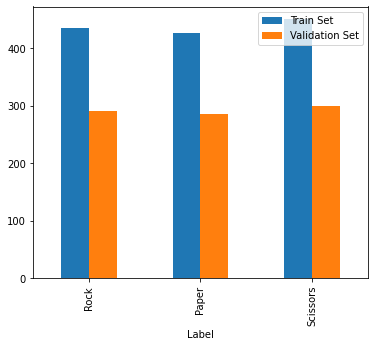

In [ ]:
# Visualisasi data : membuat bar chart
df.plot(x='Label', y=['Train Set', 'Validation Set'], kind="bar",figsize=(6,5))
plt.show()

Dari bar chart tesebut, dapat terlihat bahwa banyak data validation set kira-kira adalah 2/3 dari banyak train set, atau dengan kata lain estimasi rasio validation set : train set adalah 40 : 60, dengan demikian rasio data sudah sesuai dengan ketentuan yang ada.

**Augmentasi Gambar**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
    #karena ini merupakan masalah klasifikasi lebih dari dua kelas, maka class mode yang digunakan adalah categorical
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
    #karena ini merupakan masalah klasifikasi lebih dari dua kelas, maka class mode yang digunakan adalah categorical
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Membangun Model**

In [ ]:
# Membangun arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Melatih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 36s - loss: 1.0321 - accuracy: 0.4512 - val_loss: 0.9325 - val_accuracy: 0.4938
Epoch 2/20
25/25 - 35s - loss: 0.5731 - accuracy: 0.7875 - val_loss: 0.3881 - val_accuracy: 0.8625
Epoch 3/20
25/25 - 35s - loss: 0.2536 - accuracy: 0.9050 - val_loss: 0.2072 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 34s - loss: 0.1996 - accuracy: 0.9212 - val_loss: 0.4415 - val_accuracy: 0.8687
Epoch 5/20
25/25 - 34s - loss: 0.1793 - accuracy: 0.9425 - val_loss: 0.2941 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 34s - loss: 0.1625 - accuracy: 0.9475 - val_loss: 0.0931 - val_accuracy: 0.9875
Epoch 7/20
25/25 - 34s - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.2485 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 34s - loss: 0.1890 - accuracy: 0.9350 - val_loss: 0.2202 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 34s - loss: 0.1543 - accuracy: 0.9475 - val_loss: 0.0715 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 34s - loss: 0.0713 - accuracy: 0.9762 - val_loss: 0.2928 - val_accuracy: 0.9187
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


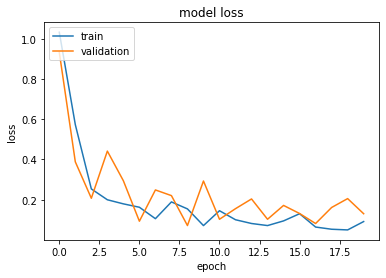

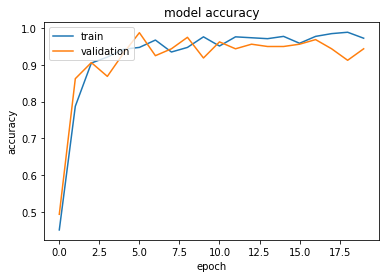

In [ ]:
# Memeriksa semua data di history
print(history.history.keys())

# Visualisasi untuk loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualisasi untuk akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Dari plot tersebut, terlihat bahwa grafik untuk train dan validation (baik untuk accuracy ataupun loss function) paralel. Akurasi yang didapatkan juga tinggi, sekitar 0.97. Hal tersebut menandakan model sudah cukup konsisten, tidak overfit (overfit ditandai dengan grafik akurasi train yang tinggi tetapi grafik akurasi validation yang rendah, atau dengan kata lain grafik akurasi train dan validation tidak paralel) dan tidak underfit (karena akurasinya tinggi). Dengan demikian, model sudah bisa dipakai. 

**Uji Coba Model**

Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl.png
0OEXfEooCXlljaEl.png
Ini adalah batu


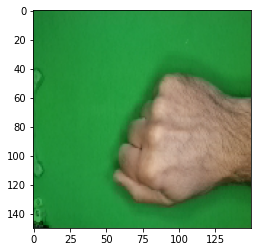

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('Ini adalah batu')
  elif classes[0,1]!=1:
    print('Ini adalah kertas')
  else:
    print('Ini adalah gunting')